In [2]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np

LOG.propagate = False

from matplotlib import pyplot as plt
import random
import numpy as np

In [111]:
# connect to Artemis

# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-02-27 01:32:21,983 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:D5:66:86:3C
2023-02-27 01:32:24,558 | INFO     |: Connected to C0:83:D5:66:86:3C


In [64]:
# disconnect from Artemis
ble.disconnect()

2023-02-27 00:40:23,318 | INFO     |: Disconnected from AB6C95E9-A4ED-4F7A-B208-0AFEAFDDA3AD


In [75]:
# test sending and receiving

ble.send_command(CMD.PING, "")

s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

PONG


In [69]:
# read and aggregate pitch and tolled timestamped data for FFT

def fft_callback(uuid, data):
    
    reading = (ble.bytearray_to_string(data)).split('|')
    
    pitch.append(float(reading[0]))
    roll.append(float(reading[1]))
    
    if len(roll) == 200:
        ble.stop_notify(ble.uuid['RX_STRING'])
    

roll = []
pitch = []

ble.start_notify(ble.uuid['RX_STRING'], fft_callback)
ble.send_command(CMD.TIMED_FFT, "")

In [56]:
# stop notifications from this characteristic

ble.stop_notify(ble.uuid['RX_STRING'])

In [70]:
# verify values are read
print(roll);
print("")
print(pitch)

print(len(pitch))


[0.815, -1.152, -1.237, -1.514, -1.168, -1.908, -1.267, -1.207, -1.355, 0.731, 0.674, -1.87, 0.84, -1.56, -2.43, -1.576, -1.142, 0.677, 0.271, 0.27, -1.352, 0.842, -1.799, -1.444, -1.683, -1.222, -1.14, -1.114, 0.243, -1.99, -1.143, -1.2, 0.485, -1.361, -1.123, 0.983, 0.815, -1.363, -1.77, 0.872, -1.811, -1.22, 0.84, -1.136, -1.64, 0.844, -1.701, -1.292, 0.816, -1.195, -1.685, -1.416, -1.121, -1.67, 0.803, 0.651, -1.821, 0.765, -1.246, -1.278, -1.6, 0.705, 0.751, -1.393, -1.95, -1.198, -1.344, -1.259, -1.387, 0.869, 0.579, -1.219, -1.77, -1.286, -1.387, 0.816, -1.776, 0.791, 0.731, -1.506, -1.565, 0.513, 0.969, 0.929, -1.28, -1.2, -1.196, -1.551, 0.811, -1.917, 0.843, -1.375, 0.814, 0.487, -1.147, -1.256, -1.248, -1.463, 0.792, 0.135, -1.88, -1.368, 0.704, 0.833, 0.595, -1.222, 0.926, 0.781, -1.979, -1.18, -1.232, -1.585, 0.901, -2.86, -1.535, -1.399, -1.989, -1.153, 0.543, -1.84, -1.253, 0.839, 0.684, -1.604, -1.84, 0.704, -1.573, -1.549, -1.391, -1.179, -1.223, 0.871, -1.574, -1.222,

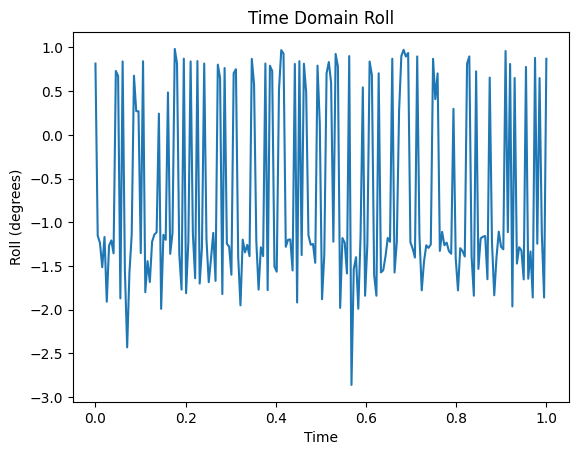

In [76]:
# again, on roll

import numpy as np
import matplotlib.pyplot as plt
from scipy import pi
from scipy.fftpack import fft

sample_rate = 200
N = (1 - 0) * sample_rate
time = np.linspace(0, 1, N)

plt.plot (time, roll)
plt.title ('Time Domain Roll')
plt.xlabel ('Time')
plt.ylabel ('Roll (degrees)')
plt.show ()



/Users/kunalgupta/Desktop/CORNELL/SP23/Fast Robots/lab3_v2/FastRobots_ble/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


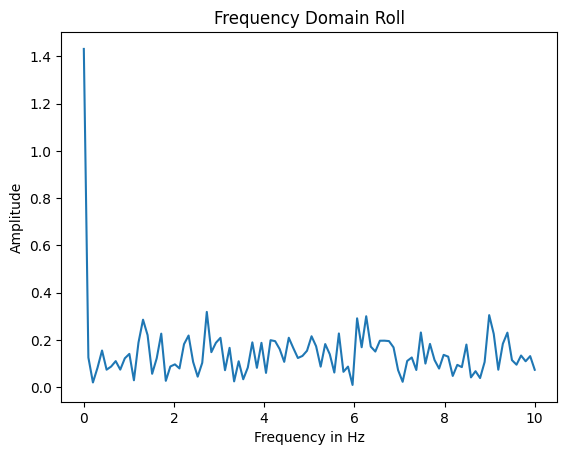

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

In [77]:
frequency = np.linspace (0.0, 10, int (N/2))

freq_data = fft(roll)
y = 2/N * np.abs (freq_data [0:np.int (N/2)])


plt.plot(frequency, y)
plt.title('Frequency Domain Roll')
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.show()

print(frequency)

In [10]:
# read and aggregate time, pitchA, rollA, pitchG, rollG, yawG

def fft_callback(uuid, data):
    
    reading = (ble.bytearray_to_string(data)).split('|')
    
    time.append(int(reading[0]))
    pitchA.append(float(reading[1]))
    rollA.append(float(reading[2]))
    pitchG.append(float(reading[3]))
    rollG.append(float(reading[4]))
    yawG.append(float(reading[5]))
    

time = []
rollA = []
pitchA = []
pitchG = []
rollG = []
yawG = []

ble.start_notify(ble.uuid['RX_STRING'], fft_callback)
ble.send_command(CMD.TIMED_FFT, "")

In [7]:
print(rollG)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.3, 0.3, 0.3, 0.4, 0.4, 0.5, 0.6, 0.5, 0.5, 0.4, 0.4, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.2, 0.0, 0.0, 0.0, 0.2, 0.3, 0.4, 0.4, 0.6, 0.8, 0.9, 0.12, 0.15, 0.17, 0.18, 0.2, 0.22, 0.27, 0.28, 0.29, 0.29, 0.3, 0.31, 0.31, 0.31, 0.32, 0.33, 0.33, 0.34, 0.35, 0.34, 0.34, 0.34, 0.33, 0.31, 0.3, 0.28, 0.25, 0.22, 0.2, 0.15, 0.11, 0.8, 0.5, 0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 0.12, 0.13, 0.16, 0.17, 0.18, 0.18, 0.19, 0.2, 0.21, 0.23, 0.24, 0.25, 0.26, 0.26, 0.27, 0.28, 0.3, 0.31, 0.32, 0.33,

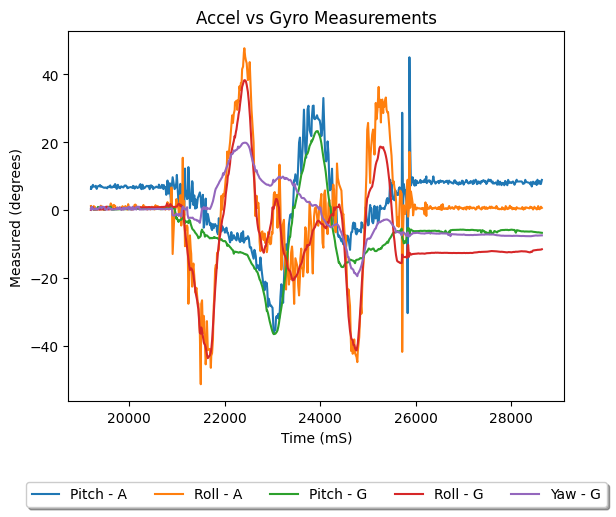

2023-02-27 00:16:28,815 | INFO     |: Disconnected from AB6C95E9-A4ED-4F7A-B208-0AFEAFDDA3AD


In [11]:
# Plot distance measurement data


plt.plot(time, pitchA, label = "Pitch - A")
plt.plot(time, rollA, label = "Roll - A")
plt.plot(time, pitchG, label = "Pitch - G")
plt.plot(time, rollG, label = "Roll - G")
plt.plot(time, yawG, label = "Yaw - G")

plt.title("Accel vs Gyro Measurements")
plt.xlabel("Time (mS)")
plt.ylabel("Measured (degrees)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)


In [57]:
# read and aggregate time, pitchA, rollA, pitchG, rollG, yawG

def fft_callback(uuid, data):
    
    reading = (ble.bytearray_to_string(data)).split('|')
    
    time.append(int(reading[0]))
    pitchC.append(float(reading[1]))
    rollC.append(float(reading[2]))
    

time = []
rollC = []
pitchC = []

ble.start_notify(ble.uuid['RX_STRING'], fft_callback)
ble.send_command(CMD.TIMED_FFT, "")

In [18]:
print(rollC)

[0.26, 0.36, 0.97, 0.93, 0.115, 0.16, 0.182, 0.208, 0.203, 0.262, 0.343, 0.465, 0.641, 0.813, 0.912, 1.193, 1.43, 1.726, 2.57, 2.3, 2.461, 2.65, 2.968, 3.301, 3.592, 3.897, 4.211, 4.587, 4.979, 5.29, 5.701, 6.1, 6.588, 7.26, 7.522, 7.955, 8.426, 8.83, 9.264, 9.725, 10.253, 10.727, 11.235, 11.671, 12.179, 12.646, 13.115, 13.584, 14.12, 14.461, 14.903, 15.422, 15.928, 16.463, 16.95, 17.454, 18.26, 18.535, 19.67, 19.635, 20.263, 20.911, 21.609, 22.374, 23.181, 23.905, 24.629, 25.322, 26.28, 26.726, 27.382, 28.102, 28.844, 29.6, 30.351, 31.16, 31.765, 32.527, 33.221, 34.2, 34.843, 35.712, 36.551, 37.409, 38.222, 39.145, 40.48, 40.853, 41.69, 42.518, 43.332, 44.243, 45.61, 45.879, 46.695, 47.549, 48.537, 49.458, 50.353, 51.159, 52.74, 52.994, 53.932, 54.859, 55.73, 56.676, 57.602, 58.49, 59.483, 60.476, 61.396, 62.456, 63.452, 64.419, 65.357, 66.259, 67.19, 68.144, 69.128, 70.163, 71.168, 72.251, 73.374, 74.539, 75.719, 76.855, 78.29, 79.191, 80.405, 81.546, 82.638, 83.789, 84.979, 86.197, 

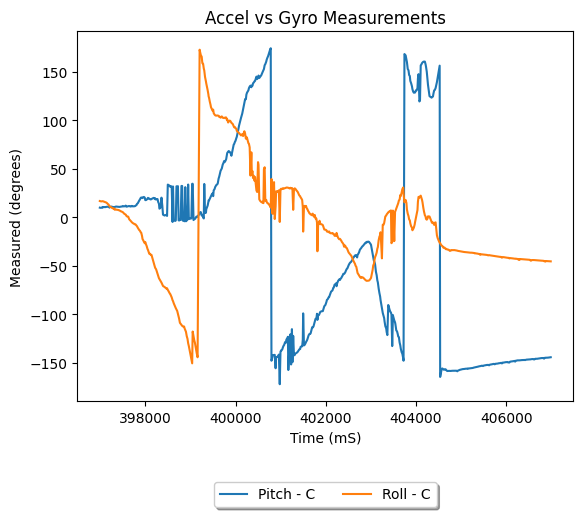

2023-02-27 00:39:47,299 | INFO     |: Disconnected from AB6C95E9-A4ED-4F7A-B208-0AFEAFDDA3AD


In [58]:
# Plot distance measurement data


plt.plot(time, pitchC, label = "Pitch - C")
plt.plot(time, rollC, label = "Roll - C")


plt.title("Accel vs Gyro Measurements")
plt.xlabel("Time (mS)")
plt.ylabel("Measured (degrees)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)


In [68]:
# read and aggregate time, pitchC, rollC, yaw

def fft_callback(uuid, data):
    
    reading = (ble.bytearray_to_string(data)).split('|')
    
    time.append(int(reading[0]))
    pitchC.append(float(reading[1]))
    rollC.append(float(reading[2]))
    yaw.append(float(reading[3]))
    

time = []
rollC = []
pitchC = []
yaw = []

ble.start_notify(ble.uuid['RX_STRING'], fft_callback)
ble.send_command(CMD.TIMED_FFT, "")

In [69]:
print(len(time))

611


In [70]:
print(time)

[14327, 14329, 14336, 14338, 14346, 14348, 14361, 14376, 14387, 14405, 14416, 14432, 14462, 14477, 14498, 14513, 14529, 14538, 14557, 14568, 14601, 14619, 14629, 14659, 14677, 14695, 14704, 14722, 14739, 14754, 14765, 14791, 14811, 14837, 14857, 14874, 14890, 14900, 14915, 14931, 14947, 14962, 14973, 14991, 15008, 15023, 15034, 15052, 15063, 15082, 15098, 15114, 15129, 15140, 15158, 15169, 15188, 15204, 15220, 15236, 15247, 15261, 15281, 15292, 15306, 15320, 15335, 15351, 15366, 15395, 15412, 15428, 15445, 15459, 15470, 15499, 15517, 15536, 15558, 15578, 15594, 15605, 15625, 15636, 15652, 15668, 15683, 15712, 15728, 15745, 15761, 15777, 15786, 15806, 15821, 15832, 15852, 15867, 15882, 15891, 15911, 15921, 15938, 15956, 15966, 15982, 15998, 16014, 16028, 16045, 16056, 16075, 16091, 16106, 16117, 16136, 16152, 16167, 16176, 16196, 16214, 16223, 16238, 16253, 16272, 16300, 16318, 16328, 16344, 16361, 16376, 16387, 16406, 16422, 16436, 16451, 16481, 16497, 16513, 16536, 16554, 16574, 16584

In [138]:
# connect to Artemis

# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-02-27 01:51:00,463 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:D5:66:86:3C
2023-02-27 01:51:02,939 | INFO     |: Connected to C0:83:D5:66:86:3C


In [137]:
# stop notifications from this characteristic

ble.stop_notify(ble.uuid['RX_STRING'])

Exception: Not connected to a BLE device

In [139]:
# read and aggregate time, pitch, roll, yaw, TOF#1, TOF#2

def fft_callback(uuid, data):
    
    reading = (ble.bytearray_to_string(data)).split('|')
    
    time.append(int(reading[0]))
    pitchC.append(float(reading[1]))
    rollC.append(float(reading[2]))
    yaw.append(float(reading[3]))
    ONEDist.append(float(reading[4]))
    TWODist.append(float(reading[5]))
    

time = []
pitchC = []
rollC = []
yaw = []
ONEDist = []
TWODist = []

ble.start_notify(ble.uuid['RX_STRING'], fft_callback)
ble.send_command(CMD.TIMED_FFT, "")

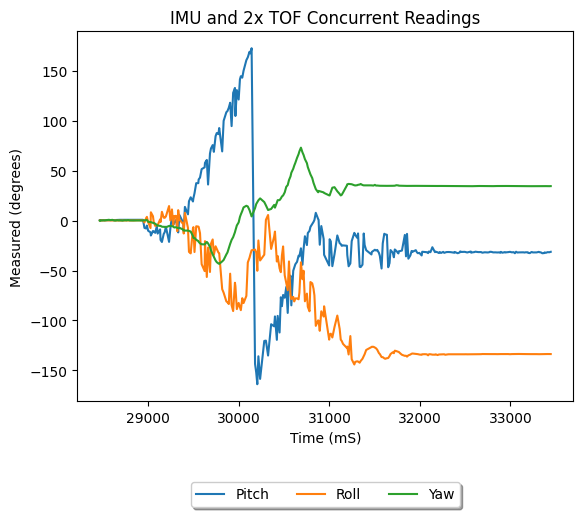

In [140]:
# Plot IMU data


plt.plot(time, pitchC, label = "Pitch")
plt.plot(time, rollC, label = "Roll")
plt.plot(time, yaw, label = "Yaw")

plt.title("IMU and 2x TOF Concurrent Readings")
plt.xlabel("Time (mS)")
plt.ylabel("Measured (degrees)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)


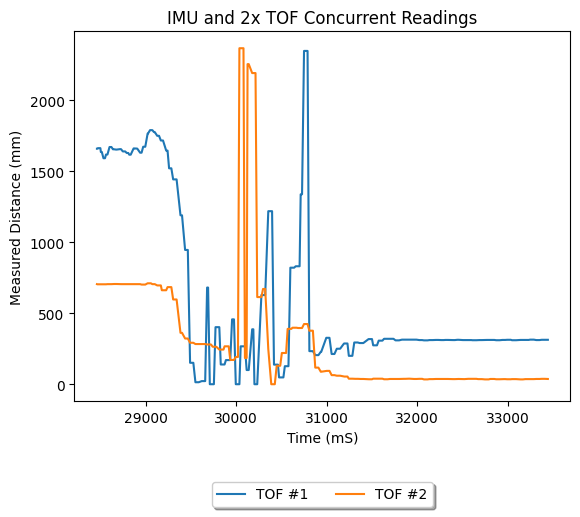

2023-02-27 01:53:49,866 | INFO     |: Disconnected from AB6C95E9-A4ED-4F7A-B208-0AFEAFDDA3AD


In [141]:
# Plot both TOFs' distance data

plt.plot(time, ONEDist, label = "TOF #1")
plt.plot(time, TWODist, label = "TOF #2")


plt.title("IMU and 2x TOF Concurrent Readings")
plt.xlabel("Time (mS)")
plt.ylabel("Measured Distance (mm)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)
